In [1]:
# 导入库
import numpy as np
import pandas as pd

In [2]:
def normalization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

In [3]:
# 读取excel数据
excel_file='../data/test1.xlsx'
df = pd.read_excel(excel_file, 'Sheet1', index_col=None, na_values=['NA'])
data=df.to_numpy()

In [4]:
# 拆分数据
params=data[:,:16]
radias=data[:,16]
sunhours=data[:,17]
features=data[:,18:]

#归一化数据
params=normalization(params)
radias=normalization(radias)
sunhours=normalization(sunhours)
features=normalization(features)

X=features
y=radias

X_train=X[:-400]
y_train=y[:-400]
X_test=X[-400:]
y_test=y[-400:]

In [5]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [10]:
mlp=nn.Sequential(*[nn.Linear(21,100),nn.LeakyReLU(),nn.Linear(100,1),nn.LeakyReLU()])
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001, betas=(0.9, 0.999))

# 训练

In [11]:
loss_list=[]
metric_list=[]
input_train = Variable(torch.FloatTensor(X_train),requires_grad=False)
truth_train = Variable(torch.FloatTensor(y_train.reshape(-1,1)),requires_grad=False)
input_test = Variable(torch.FloatTensor(X_test),requires_grad=False)
truth_test = Variable(torch.FloatTensor(y_test.reshape(-1,1)),requires_grad=False)
for epoch in range(0, 10000):
    mlp.zero_grad()
    pred_train=mlp(input_train)
    loss = criterion(pred_train, truth_train)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    metric = criterion(mlp(input_test),truth_test)
    metric_list.append(metric.item())
    if epoch%100==0:
        print("train loss:%f, val loss:%f"%(loss.item(),metric.item()))

train loss:0.926429, val loss:1.015086
train loss:0.437852, val loss:0.526019
train loss:0.428053, val loss:0.516304
train loss:0.408273, val loss:0.495229
train loss:0.357490, val loss:0.441924
train loss:0.268873, val loss:0.342979
train loss:0.161418, val loss:0.221277
train loss:0.092749, val loss:0.138523
train loss:0.063236, val loss:0.098563
train loss:0.047526, val loss:0.075568
train loss:0.035917, val loss:0.055972
train loss:0.028381, val loss:0.042670
train loss:0.022880, val loss:0.033948
train loss:0.019175, val loss:0.027603
train loss:0.016498, val loss:0.023453
train loss:0.014482, val loss:0.020400
train loss:0.012914, val loss:0.018121
train loss:0.011924, val loss:0.016584
train loss:0.011224, val loss:0.015814
train loss:0.010589, val loss:0.015282
train loss:0.010110, val loss:0.014953
train loss:0.009607, val loss:0.014635
train loss:0.009232, val loss:0.014425
train loss:0.008932, val loss:0.014251
train loss:0.008678, val loss:0.014284
train loss:0.008483, val 

In [12]:

pred_test=mlp(input_test).detach().numpy()
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %f" % mean_squared_error(y_test, pred_test))
print("Coefficient of determination: %f" % r2_score(y_test, pred_test))

Mean squared error: 0.017589
Coefficient of determination: 0.983835


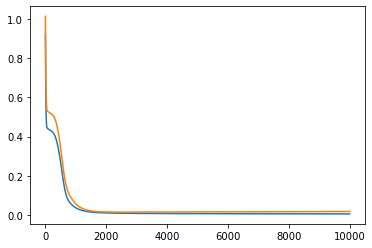

In [13]:
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.plot(metric_list)
plt.show()